# Section 6.5.1
# Hantush wells introduction type curves

IHE, module transient groundwater

Olsthoorn, 2019-01-03

Hantush (1956) considered the transient flow due to a well with a constant extraction since $t=0$ placed in a uniform confined aquifer of infinite extent covered by a layer with constant vertical resistance $c$ above which a constant head is maintained.

The partial differential equation now contains the leakage between the aquifer and the layer with maintained head.

$$ \frac {\partial s^2} {\partial r^2} + \frac 1 r \frac {\partial \phi} {\partial r} 
- \frac s {kD c} = \frac S {kD} \frac {\partial s} {\partial t} $$

$$ s(x, t) = 0$$

$$ Q = kD (2 \pi r) \frac {\partial \phi} {\partial r}, \,\,\, \mathtt{for}\,\,\, r=r_0 $$

The solution may be opbtained by straighforward Lapace transformation and looking up de result from the Laplace inversions table. It reads with
$$ \lambda = \sqrt{ kD c} $$

$$ s(r, t) = \frac Q {4 \pi kD} W_h(u, \frac r \lambda),\,\,\,\, u = \frac {r^2 S} {4 kD t}$$

where $W_h(..)$ is the so-called Hantush well function, which, obviously differs from the Theis well function

Theis:

$$ W(z) = \mathtt{exp1}(z) = \intop _z ^\infty \frac {e^{-y}} {y} dy $$

Hantush:

$$ W_h(z, \rho) = \intop_u ^\infty \frac {e^{-y-\left(\frac \rho 2 \right)^2}} y dy $$

with $\rho = \frac r \lambda $ and $u = \frac {r^2 S} {4 kD t} $

In [6]:
from scipy.special import exp1
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

## Implementing the integral

In [16]:

def Wh(u, rho):
    '''Numerical integration using quad'''
    def kernel(y, rho): return np.exp(-y - (rho / 2)**2 /y)  / y
    def wh(u, rho):     return quad(kernel, u, np.inf, (rho,))
    wh = np.frompyfunc(wh, 2, 2)
    return wh(u, rho)[0]


def Wh2(u, rho, tol=1e-14):
    '''Return Hantush using summation.
    
    This implementation works but has a limited reach; for very small
    values of u (u<0.001) the solution will deteriorate into nonsense,
    '''
    #import pdb
    #pdb.set_trace()
    tau = (rho/2)**2 / u
    f0 = 1
    E =  exp1(u)
    w0= f0 * E
    W = w0
    for n in range(1, 500):
        E = (1/n) * (np.exp(-u) - u * E)
        f0 = -f0 / n * tau
        w1 = f0 * E
        #print(w1)
        if np.max(abs(w0 + w1)) < tol: # use w0 + w1 because terms alternate sign
            #print('succes')
            break
        W += w1
        w0 = w1 # remember previous value
    return W

# Timing and test
u = np.array([1e-3, 1e-2, 1e-1, 1, 10])
rho=0.3
print("Hantush quad :")
%timeit Wh(u, rho)
print(Wh(u, rho))
print("Hantush series:")
%timeit Wh2(u, rho)
print(Wh2(u, rho))

Hantush quad :
1.1 ms ± 37.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
[2.7449201210813685 2.7104287908047175 1.6703650224009043
 0.21607038863750141 4.1483598657236765e-06]
Hantush series:
1.02 ms ± 90.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
[2.74492012e+00 2.71042879e+00 1.67036502e+00 2.16070389e-01
 4.14835987e-06]


In conclusies both implementations function equally well.

## Hantush Type curves

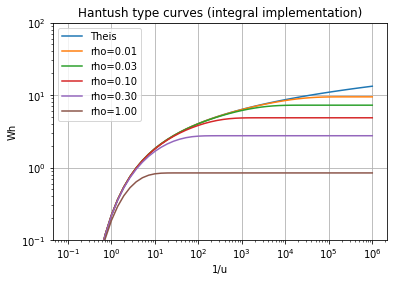

In [18]:
u = np.logspace(-6, 1)
rhos = [0.01, 0.03, 0.1, 0.3, 1]

plt.title('Hantush type curves (integral implementation)')
plt.xlabel('1/u')
plt.ylabel('Wh')
plt.xscale('log')
plt.yscale('log')
plt.ylim((0.1, 100))
plt.grid()

plt.plot(1/u, exp1(u), label='Theis')
for rho in rhos:
    plt.plot(1/u, Wh(u, rho), label='rho={:.2f}'.format(rho))
    #plt.plot(1/u, Wh2(u, rho), label='rho={:.2f}'.format(rho))
    # This breaks down for higher times when became stationary. At least with 500 terms.
    
plt.legend()
plt.show()